# Crime Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
crime = pd.read_excel('Crime.xlsx')

In [5]:
crime.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,0.0,0.0,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,0.0,0.0,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,0.0,0.0,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,0.0,0.0,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


In [6]:
#from pandas_profiling import ProfileReport
#ProfileReport(crime)

Dropping the Federal Row

In [7]:
crime = crime.iloc[1:,:]

Populating Rape revision

In [8]:
crime.rape_legacy.isnull().sum()

66

In [9]:
crime.rape_revised.isnull().sum()

616

In [10]:
rev = []
count = 0 
els = 0
n = 0
for i, j in crime[['rape_legacy','rape_revised']].iterrows(): 
    if np.isnan(j[1]) and not np.isnan(j[0]):
        rev.append(j[0])
    else:
        rev.append(j[1])
        els += 1
        
    if np.isnan(j[1]) and np.isnan(j[0]):
        n += 1

print (n) # Rows having NULL for both the vars

16


In [11]:
np.isnan(rev).sum()

16

In [12]:
crime = crime.reset_index(drop=True)

In [13]:
crime.rape_revised = pd.Series(rev)

Dropping the rape_legacy columns

In [14]:
crime.drop(columns=['rape_legacy'],inplace=True)

Missing value treatment (Dropping the rows with nan values)

In [15]:
crime = crime.dropna()

In [16]:
crime.count().value_counts()

799    16
dtype: int64

Preparing the dataset for modelling

In [17]:
data_all = crime.copy()

In [18]:
data_all.includes_jails = np.where(data_all.includes_jails == True, 1, 0)

In [19]:
data = data_all.iloc[:,1:] #Splitting the jurisdiction from the data

In [20]:
data.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,0,2001,24741,0.0,0.0,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
1,1,2001,4570,0.0,0.0,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
2,0,2001,27710,0.0,0.0,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
3,0,2001,11489,0.0,0.0,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
4,0,2001,157142,0.0,0.0,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0


In [21]:
#profile_report = ProfileReport(data)
#profile_report.to_file('F:\\Data Science\\Alabs Python + ML\\Analytixlabs\\Machine Learning\\Clustering K - Means\\Datasets\\crime_profile_report.html')

From the profiling report <br>
It is noted that the following Features has to be **rejected** due to High Correlation, <br>
burglary <br>
larceny <br>
murder_manslaughter <br>
prisoner_count <br>
property_crime_total <br>
rape_revised <br>
robbery <br>
state_population <br>
vehicle_theft <br>
violent_crime_total <br>
year <br>

The following Features **remain** after the rejection,<br>
agg_assault <br>
crime_reporting_change<br>
crimes_estimated<br>
inculeds_jails


**Missing value and Outlier treatment**

In [22]:
data.drop(columns=['year'],inplace=True)

In [23]:
data.head()

,includes_jails,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,0,24741,0.0,0.0,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
1,1,4570,0.0,0.0,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
2,0,27710,0.0,0.0,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
3,0,11489,0.0,0.0,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
4,0,157142,0.0,0.0,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0


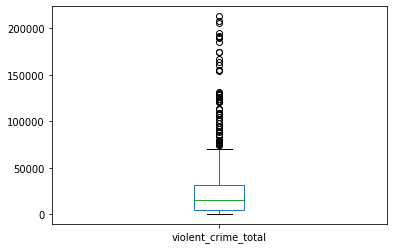

In [24]:
data.violent_crime_total.plot(kind='box')
plt.show()

In [25]:
def Outlier_treat(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

In [26]:
data_out = data.apply(Outlier_treat)

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


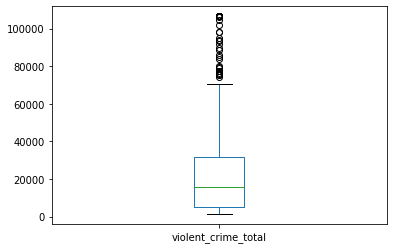

In [27]:
data_out.violent_crime_total.plot(kind='box')
plt.show()

## Feature Reduction using the PCA

**PCA** <br>
PCA is unsupervised algorithm, popularly used for dimensionality reduction (Feature Extraction)<br>
- Used for : Noise filtering, Feature extraction, Stock market predictions

The goal is to identify the correlation among the variables.

**Definition:** Finding the directions of maximum variance in High dimensional data and projecting that in small dimensional sub space while retaining most of the information.


Functions in the PCA: <br>
1 - Standardise the data<br>
2 - Obtain the eigen vectors and eigen values from Correlation/ Covariance matrix<br>
3 - Choose the k number of components based on cumulative variance is explaining >75% and individual component explaining > 0.8 variance<br>
4 - Construct projection matrix W from selected k eigen vectors<br>
5 - Transform the orginal dataset X via W to obtain a k-dimensional feature subspace Y

PCA is unsupervised model as it does not consider the dependent variable 

**1 Splitting the dataset**

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=7)

In [29]:
train.shape , test.shape

((559, 14), (240, 14))

**2 Feature scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

fit() ------------------> just calculates the parameters (e.g. μ and σ in case of StandardScaler) <br>
transform() ------------> helps to apply the scaling based on the calculated parameters from fit()

In [31]:
train_scaled = sc.fit_transform(train) 

In [32]:
test_scaled = sc.transform(test)

**3 Applying PCA** 

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [34]:
train_scaled = pca.fit_transform(train_scaled)

In [35]:
test_scaled = pca.transform(test_scaled)

**3.1** Eigen value

In [36]:
pca.explained_variance_

array([1.04377040e+01, 1.01444458e+00, 1.01025661e+00, 9.21652071e-01,
       2.16537713e-01, 1.33336997e-01, 1.07635697e-01, 8.06109946e-02,
       4.51927721e-02, 2.89350113e-02, 1.56253623e-02, 1.31578318e-02,
       4.15602667e-32, 2.63910620e-32])

**3.2** Variance explained by each PC in Cumulative Percentage 

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.74421656, 0.81654726, 0.88857936, 0.95429388, 0.96973319,
       0.97924023, 0.98691474, 0.99266237, 0.99588465, 0.99794774,
       0.99906184, 1.        , 1.        , 1.        ])

**3.3** Selecting the Number of Principal components based on <br>
Cumulative percentage of variance > 75% <br>
Eigen value > 0.8

Based on the above criteria for selection we conclude **Number of PC = 2** 

**3.4** Fitting the model again with the select number PC

In [38]:
pca_final = PCA(n_components=2)

In [39]:
pca_final = pca_final.fit(train_scaled)

In [40]:
pca_final.explained_variance_

array([10.43770397,  1.01444458])

In [41]:
np.cumsum(pca_final.explained_variance_ratio_)

array([0.74421656, 0.81654726])

**3.5** Dimension Reduction 

In [42]:
# Applying the pca model on the scaled train data, which gives the array with specified number of PCs
reduced_factors = pca_final.transform(train_scaled) #----------->    this gives the factors

In [43]:
dimensions = pd.DataFrame(reduced_factors, columns=['F1','F2']);
dimensions.head(2)

,F1,F2
0,-2.066225,0.076542
1,6.310423,0.025599


**3.6** Factor Loading Matrix / Component loadings

Loadings=Eigenvectors * sqrt(Eigenvalues)

Factor loadings are the covariances/correlations between the original variables and the unit-scaled components. (i.e., PCs ~ Initial Columns ) <br>

Factors Loadings are the percent of variance in a variable explained by the factor

In [44]:
eigen_vector = pca_final.components_.T

In [45]:
eigen_value = pca_final.explained_variance_

In [46]:
Factor_loading_matrix = pd.DataFrame((eigen_vector * np.sqrt(eigen_value)).T,columns=train.columns).T

In [47]:
Factor_loading_matrix

,0,1
includes_jails,3.230744e+00,2.494623e-15
prisoner_count,-8.001899e-15,1.007196e+00
crime_reporting_change,3.877354e-15,6.005908e-15
crimes_estimated,-4.038228e-15,1.356067e-14
state_population,-5.543729e-18,-2.398593e-16
violent_crime_total,1.326305e-17,-9.797128e-17
murder_manslaughter,4.394868e-17,-8.938324e-17
rape_revised,-1.781728e-17,3.779445e-18
robbery,-9.985413e-18,-3.968433e-18
agg_assault,7.932674e-18,-4.467889e-18


In [48]:
#Factor_loading_matrix.to_excel('F:\\Data Science\\Alabs Python + ML\\Analytixlabs\\Machine Learning\\Clustering K - Means\\Datasets\\Factor_Loading_matrix.xlsx')

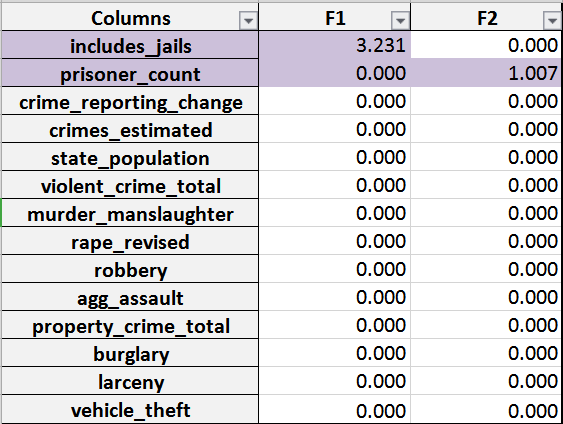

**3.7** Selecting the Features based on the factor loadings

In [49]:
selected_vars = ['includes_jails','prisoner_count']

Conclusion for Feature Reduction: <br>
As per the correlation from profiling report, <br>
> > agg_assault <br>
crime_reporting_change <br>
crimes_estimated<br>
inculdes_jails

As per the PCA,
> > includes_jails<br>
prisoner_count 

The above features from PCA explain the most variance in the dataset.

**4** Creating the dataset with reduced features

In [50]:
df_train_scaled = pd.DataFrame(train_scaled, columns = train.columns)

In [51]:
df_train_scaled_final = df_train_scaled[selected_vars]

In [52]:
df_train_scaled_final.head()

,includes_jails,prisoner_count
0,-2.066225,0.076542
1,6.310423,0.025599
2,-0.818688,0.069363
3,2.396603,0.025250
4,-0.024759,0.055163


As per Business we also select the below dataset:

In [53]:
df_train_scaled_final_2 = df_train_scaled[['includes_jails','prisoner_count','violent_crime_total',
                                          'property_crime_total']]

In [54]:
df_train_scaled_final_2.head()

,includes_jails,prisoner_count,violent_crime_total,property_crime_total
0,-2.066225,0.076542,0.007138,0.027100
1,6.310423,0.025599,-0.710020,0.040625
2,-0.818688,0.069363,-0.171649,-0.220631
3,2.396603,0.025250,-0.285079,0.002142
4,-0.024759,0.055163,-0.202018,-0.161526


------------------------------------------ End of Feature Reduction with PCA ---------------------------------------

## Finding the Optimum # Clusters

The Optimum # Clusters can be found using,
> Dendogram <br>
Elbow method (WCSS) <br>
Silhouette Score Analysis

### 1 Elbow Method

**WCSS** - Within Cluster Sum of Squares <br>
SStotal = SSwithin + SSbetween <br>
So, if SSwithin is minimized then SSbetween is maximized

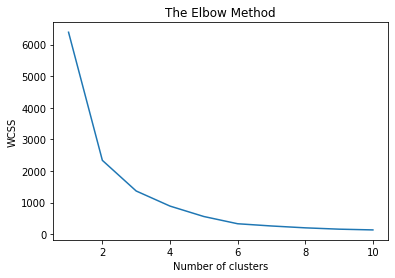

In [55]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(df_train_scaled_final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the Elbow Method we can conclude that there is a sudden drop in WCSS after the **2 Clusters#**

---

### 2 Silhouette Score Analysis

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [61]:
from sklearn import metrics

In [62]:
# calculate SC for K=1 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=7)
    km.fit(df_train_scaled_final)
    scores.append(metrics.silhouette_score(df_train_scaled_final, km.labels_))

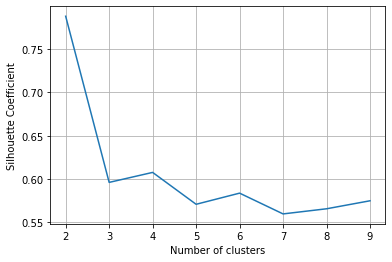

In [63]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

---

Elbow 2

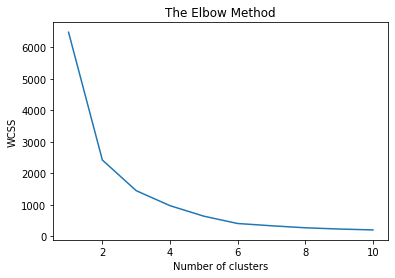

In [64]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(df_train_scaled_final_2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette 2

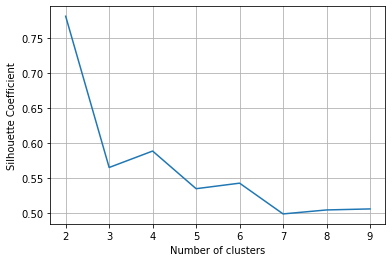

In [60]:
# calculate SC for K=1 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=7)
    km.fit(df_train_scaled_final_2)
    scores.append(metrics.silhouette_score(df_train_scaled_final_2, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

**Conclusion for finding Optimal # Clusters:** <br>
From the Elbow method and Silhouette Score Analysis - The both methods gives **2 #Clusters** as Optimum limit

**------------------------------------------------------------------------- End of Optimum # Clusters ------------------------------------------------------**

## Model Implementation

Fitting the Model with Optimum # Clusters

- Can fit the model either to scaled array(train_scaled) or to the df(df_train_scaled)

For 2 # Clusters

In [65]:
kmeans = KMeans(n_clusters = 2, random_state = 7)

In [66]:
y_km_2 = kmeans.fit_predict( df_train_scaled )

For 3 # Clusters

In [67]:
kmeans_3 = KMeans(n_clusters = 3, random_state = 7)

In [68]:
y_km_3 = kmeans_3.fit_predict( df_train_scaled )

In [70]:
# Applying Kmeans in the Reduced Dataset and Entire Dataset
y_f1 = kmeans.fit_predict( df_train_scaled_final)
y_f2 = kmeans.fit_predict(df_train_scaled_final_2)

In [75]:
df_train_scaled_final.columns, df_train_scaled_final_2.columns

(Index(['includes_jails', 'prisoner_count'], dtype='object'),
 Index(['includes_jails', 'prisoner_count', 'violent_crime_total',
        'property_crime_total'],
       dtype='object'))

In [77]:
count = 0
for i,j,k in zip(y_km_2,y_f1,y_f2):
    if i==j and i==k:
        count+=1
print(count)         #Able to get same prediction with 2#, 4#, all# columns 

559


In [114]:
train['Cluster_2'] = y_km_2
train['Cluster_3'] = y_km_3

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
train.head()

,includes_jails,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,Cluster_2,Cluster_3
434,0,4490,0.0,0.0,1796619.0,5199.0,41.0,617.0,1220.0,3321.0,49731.0,8726.0,37496.0,3509.0,0,0
518,0,100861,0.0,0.0,19082262.0,98198.0,984.0,5273.0,25622.0,66319.0,671200.0,170171.0,461408.0,39621.0,1,2
48,0,20766,0.0,0.0,5405947.0,12486.0,192.0,1142.0,4444.0,6708.0,166924.0,26927.0,125275.0,14722.0,0,0
136,0,44350,0.0,0.0,11437680.0,38185.0,526.0,4660.0,16895.0,16104.0,417483.0,95083.0,281383.0,41017.0,0,2
268,0,24901,0.0,0.0,6313520.0,20303.0,361.0,1811.0,7175.0,10956.0,217783.0,45538.0,150655.0,21590.0,0,0


## Profiling

**1 Size**

In [121]:
size = pd.concat([pd.Series(train.Cluster_2.size), 
                  pd.Series.sort_index(train.Cluster_2.value_counts()), 
                  pd.Series.sort_index(train.Cluster_3.value_counts())])           

In [123]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_size.T

,0,0,1,0,1,2
Seg_size,559,521,38,432,31,96


In [128]:
Seg_Percent = pd.DataFrame(size/train.Cluster_2.size, columns=['Seg_Pct'])
Seg_Percent.T

,0,0,1,0,1,2
Seg_Pct,1.0,0.932021,0.067979,0.772809,0.055456,0.171735


In [133]:
P1 = pd.concat([Seg_size.T, Seg_Percent.T], axis=0)

In [134]:
P1

,0,0,1,0,1,2
Seg_size,559.0,521.000000,38.000000,432.000000,31.000000,96.000000
Seg_Pct,1.0,0.932021,0.067979,0.772809,0.055456,0.171735


---

**2 Mean of each Clusters**

In [130]:
O_mean = train.apply(lambda x: x.mean()).T

In [135]:
P2 = pd.concat([O_mean, 
           train.groupby('Cluster_2').apply(lambda x: x.mean()).T, 
           train.groupby('Cluster_3').apply(lambda x: x.mean()).T],
         axis=1)

In [136]:
P2

,0,0,1,0,1,2
includes_jails,1.127013e-01,1.209213e-01,0.000000e+00,1.458333e-01,0.000000e+00,0.000000e+00
prisoner_count,2.588346e+04,1.828801e+04,1.300210e+05,1.294828e+04,1.389051e+05,4.759520e+04
crime_reporting_change,7.155635e-03,7.677543e-03,0.000000e+00,4.629630e-03,0.000000e+00,2.083333e-02
crimes_estimated,2.504472e-02,2.687140e-02,0.000000e+00,4.629630e-03,0.000000e+00,1.250000e-01
state_population,6.265329e+06,4.769644e+06,2.677196e+07,3.407030e+06,2.841762e+07,1.197433e+07
violent_crime_total,2.721591e+04,1.926695e+04,1.362003e+05,1.295788e+04,1.453541e+05,5.322825e+04
murder_manslaughter,3.260340e+02,2.435048e+02,1.457553e+03,1.636782e+02,1.560839e+03,6.578958e+02
rape_revised,1.995946e+03,1.530392e+03,8.378947e+03,1.115458e+03,9.029419e+03,3.686917e+03
robbery,8.083589e+03,5.629787e+03,4.172650e+04,3.383447e+03,4.501581e+04,1.730820e+04
agg_assault,1.681034e+04,1.186327e+04,8.463726e+04,8.295294e+03,8.974806e+04,3.157524e+04


In [139]:
Profiling_output = pd.concat([P1,P2], axis=0)

In [141]:
Profiling_output.columns = ['Overall', 'KM2_1', 'KM2_2','KM3_1','KM3_2','KM3_3']

In [142]:
Profiling_output

,Overall,KM2_1,KM2_2,KM3_1,KM3_2,KM3_3
Seg_size,5.590000e+02,5.210000e+02,3.800000e+01,4.320000e+02,3.100000e+01,9.600000e+01
Seg_Pct,1.000000e+00,9.320215e-01,6.797853e-02,7.728086e-01,5.545617e-02,1.717352e-01
includes_jails,1.127013e-01,1.209213e-01,0.000000e+00,1.458333e-01,0.000000e+00,0.000000e+00
prisoner_count,2.588346e+04,1.828801e+04,1.300210e+05,1.294828e+04,1.389051e+05,4.759520e+04
crime_reporting_change,7.155635e-03,7.677543e-03,0.000000e+00,4.629630e-03,0.000000e+00,2.083333e-02
crimes_estimated,2.504472e-02,2.687140e-02,0.000000e+00,4.629630e-03,0.000000e+00,1.250000e-01
state_population,6.265329e+06,4.769644e+06,2.677196e+07,3.407030e+06,2.841762e+07,1.197433e+07
violent_crime_total,2.721591e+04,1.926695e+04,1.362003e+05,1.295788e+04,1.453541e+05,5.322825e+04
murder_manslaughter,3.260340e+02,2.435048e+02,1.457553e+03,1.636782e+02,1.560839e+03,6.578958e+02
rape_revised,1.995946e+03,1.530392e+03,8.378947e+03,1.115458e+03,9.029419e+03,3.686917e+03


In [143]:
Profiling_output.to_excel('F:\\Data Science\\Alabs Python + ML\\Analytixlabs\\Machine Learning\\Clustering K - Means\\Datasets\\Profile_output.xlsx')

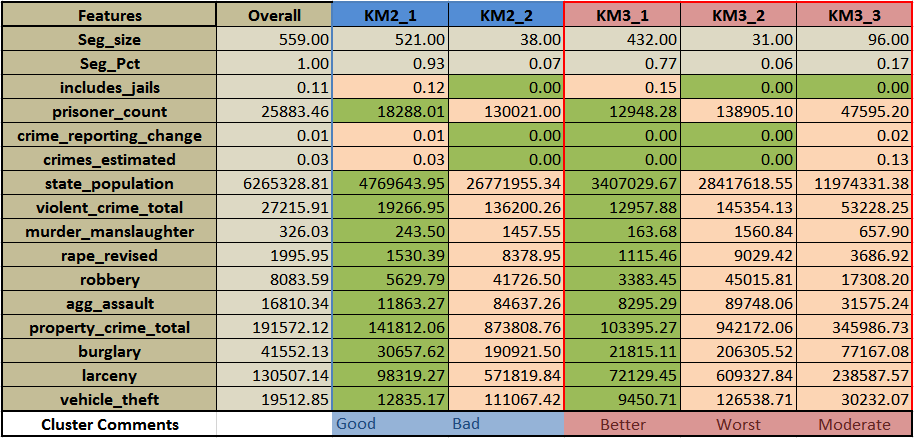

**Conclusion** <br>
From the above profiling report, each clusters are identified with their characteristics.

## Model Implementation on Test and validation

For 2 # Clusters

In [151]:
train.columns.difference(test.columns)

Index(['Cluster_2', 'Cluster_3'], dtype='object')

In [152]:
df_test_scaled = pd.DataFrame(test_scaled, columns = test.columns)

In [156]:
test_y_km_2 = kmeans.predict( df_test_scaled ) #Predict using the train's fit()

In [170]:
test['Cluster_2'] = test_y_km_2

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 3 # Clusters

In [164]:
test_y_km_3 = kmeans_3.predict( df_test_scaled ) #Predict using the train's fit()

In [169]:
test['Cluster_3'] = test_y_km_3

C:\Users\guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
test.head(2)

,includes_jails,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,Cluster_3,Cluster_2
747,0,1772,0.0,0.0,756927.0,1812.0,21.0,345.0,148.0,1298.0,16020.0,2997.0,11440.0,1583.0,0,0
533,0,15390,0.0,0.0,2977457.0,8009.0,232.0,863.0,2496.0,4418.0,89809.0,30722.0,54179.0,4908.0,0,0


**Profiling for the test**

In [176]:
size = pd.concat([pd.Series(test.Cluster_2.size), 
                  pd.Series.sort_index(test.Cluster_2.value_counts()), 
                  pd.Series.sort_index(test.Cluster_3.value_counts())])           

In [177]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_size.T

,0,0,1,0,1,2
Seg_size,240,228,12,192,11,37


In [178]:
Seg_Percent = pd.DataFrame(size/test.Cluster_2.size, columns=['Seg_Pct'])
Seg_Percent.T

,0,0,1,0,1,2
Seg_Pct,1.0,0.95,0.05,0.8,0.045833,0.154167


In [179]:
P1 = pd.concat([Seg_size.T, Seg_Percent.T], axis=0)

In [180]:
P1

,0,0,1,0,1,2
Seg_size,240.0,228.00,12.00,192.0,11.000000,37.000000
Seg_Pct,1.0,0.95,0.05,0.8,0.045833,0.154167


---

**2 Mean of each Clusters**

In [181]:
O_mean = test.apply(lambda x: x.mean()).T

In [182]:
P2 = pd.concat([O_mean, 
           test.groupby('Cluster_2').apply(lambda x: x.mean()).T, 
           test.groupby('Cluster_3').apply(lambda x: x.mean()).T],
         axis=1)

In [183]:
P2

,0,0,1,0,1,2
includes_jails,1.375000e-01,1.447368e-01,0.000000e+00,1.718750e-01,0.000000e+00,0.000000e+00
prisoner_count,2.393016e+04,1.802086e+04,1.362070e+05,1.280314e+04,1.394131e+05,4.733762e+04
crime_reporting_change,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
crimes_estimated,1.250000e-02,1.315789e-02,0.000000e+00,5.208333e-03,0.000000e+00,5.405405e-02
state_population,5.622778e+06,4.592504e+06,2.519798e+07,3.446780e+06,2.570686e+07,1.094350e+07
violent_crime_total,2.392853e+04,1.821554e+04,1.324752e+05,1.321479e+04,1.361554e+05,4.615938e+04
murder_manslaughter,2.849792e+02,2.243114e+02,1.437667e+03,1.554062e+02,1.480000e+03,6.020811e+02
rape_revised,1.881808e+03,1.562794e+03,7.943083e+03,1.206490e+03,8.050000e+03,3.552378e+03
robbery,6.795988e+03,5.067697e+03,3.963350e+04,3.305932e+03,4.112745e+04,1.469989e+04
agg_assault,1.496575e+04,1.136074e+04,8.346092e+04,8.546964e+03,8.549791e+04,2.730503e+04


In [184]:
Profiling_output = pd.concat([P1,P2], axis=0)

In [185]:
Profiling_output.columns = ['Overall', 'KM2_1', 'KM2_2','KM3_1','KM3_2','KM3_3']

In [186]:
Profiling_output

,Overall,KM2_1,KM2_2,KM3_1,KM3_2,KM3_3
Seg_size,2.400000e+02,2.280000e+02,1.200000e+01,1.920000e+02,1.100000e+01,3.700000e+01
Seg_Pct,1.000000e+00,9.500000e-01,5.000000e-02,8.000000e-01,4.583333e-02,1.541667e-01
includes_jails,1.375000e-01,1.447368e-01,0.000000e+00,1.718750e-01,0.000000e+00,0.000000e+00
prisoner_count,2.393016e+04,1.802086e+04,1.362070e+05,1.280314e+04,1.394131e+05,4.733762e+04
crime_reporting_change,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
crimes_estimated,1.250000e-02,1.315789e-02,0.000000e+00,5.208333e-03,0.000000e+00,5.405405e-02
state_population,5.622778e+06,4.592504e+06,2.519798e+07,3.446780e+06,2.570686e+07,1.094350e+07
violent_crime_total,2.392853e+04,1.821554e+04,1.324752e+05,1.321479e+04,1.361554e+05,4.615938e+04
murder_manslaughter,2.849792e+02,2.243114e+02,1.437667e+03,1.554062e+02,1.480000e+03,6.020811e+02
rape_revised,1.881808e+03,1.562794e+03,7.943083e+03,1.206490e+03,8.050000e+03,3.552378e+03


In [187]:
Profiling_output.to_excel('F:\\Data Science\\Alabs Python + ML\\Analytixlabs\\Machine Learning\\Clustering K - Means\\Datasets\\Profile_output_test.xlsx')

**Test**

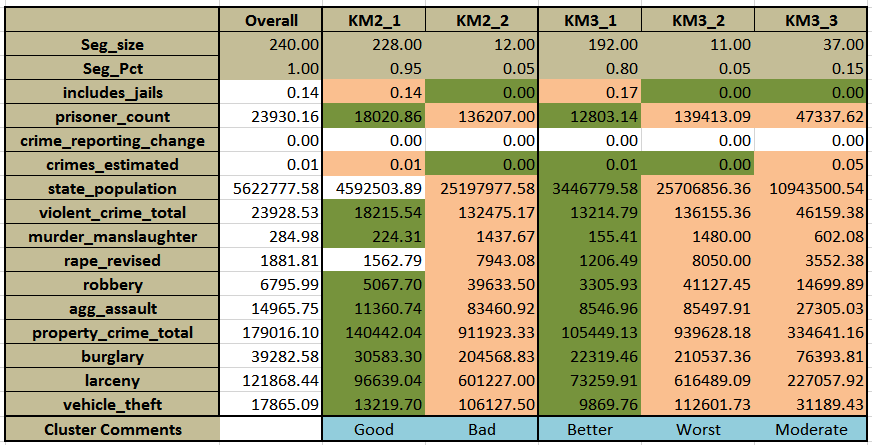

**Train**

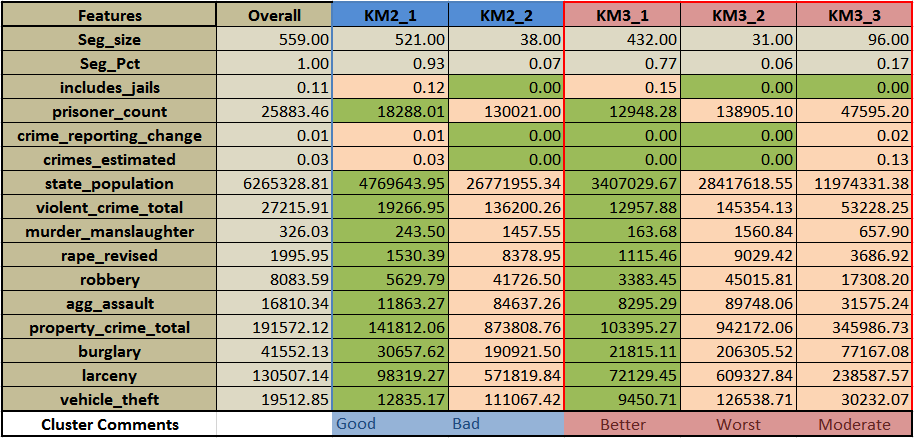

**Conclusion:**
On comparing the Train and Test Clusters from the profile report it is found that both exihibit similar patterns of cluster deductions. Thus the Model is Valid

---